In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline



In [5]:
dataFrame = pd.read_csv('/mnt/d/code/data-engineering-projects/eventStreamingEndToEndDataEngineering/static/indexProcessed.csv')
dataFrame

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [9]:
dataFrame['Index'].unique()

array(['HSI', 'NYA', 'IXIC', '000001.SS', 'N225', 'N100', '399001.SZ',
       'GSPTSE', 'NSEI', 'GDAXI', 'SSMI', 'TWII', 'J203.JO'], dtype=object)

In [11]:
dfnya = dataFrame[dataFrame['Index']=='NYA']

In [12]:
dfnya

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
8492,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,528.690002
8493,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,527.210022
8494,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,527.840027
8495,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,531.119995
8496,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,532.070007
...,...,...,...,...,...,...,...,...,...
22434,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,16464.689450
22435,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,16390.189450
22436,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,16451.960940
22437,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,16531.949220


In [13]:
dfnya.shape

(13947, 9)

In [14]:
dfnya.describe()


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,1.394700e+04,13947.000000
mean,4451.778151,4468.236552,4433.695014,4452.174711,4452.174711,1.215565e+09,4452.174711
std,4074.953735,4095.166918,4052.801658,4075.459366,4075.459366,1.834155e+09,4075.459366
min,347.769989,347.769989,347.769989,347.769989,347.769989,0.000000e+00,347.769989
25%,654.940002,654.940002,654.940002,654.940002,654.940002,0.000000e+00,654.940002
50%,2631.800049,2631.800049,2631.800049,2631.800049,2631.800049,0.000000e+00,2631.800049
75%,7339.489990,7375.719971,7276.889893,7337.935059,7337.935059,2.681975e+09,7337.935059
max,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10,16590.429690


In [15]:
dfnya.dtypes

Index         object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
CloseUSD     float64
dtype: object

In [17]:
dfnya.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [18]:
dfnya.corr()


,Open,High,Low,Close,Adj Close,Volume,CloseUSD
Open,1.000000,0.999963,0.999937,0.999912,0.999912,0.801175,0.999912
High,0.999963,1.000000,0.999912,0.999949,0.999949,0.803457,0.999949
Low,0.999937,0.999912,1.000000,0.999958,0.999958,0.798041,0.999958
Close,0.999912,0.999949,0.999958,1.000000,1.000000,0.800783,1.000000
Adj Close,0.999912,0.999949,0.999958,1.000000,1.000000,0.800783,1.000000
Volume,0.801175,0.803457,0.798041,0.800783,0.800783,1.000000,0.800783
CloseUSD,0.999912,0.999949,0.999958,1.000000,1.000000,0.800783,1.000000


<AxesSubplot:>

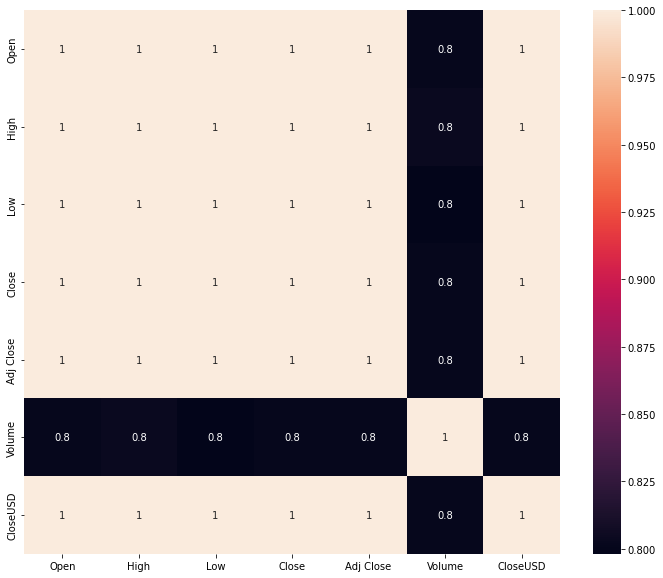

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(dfnya.corr(),annot=True)

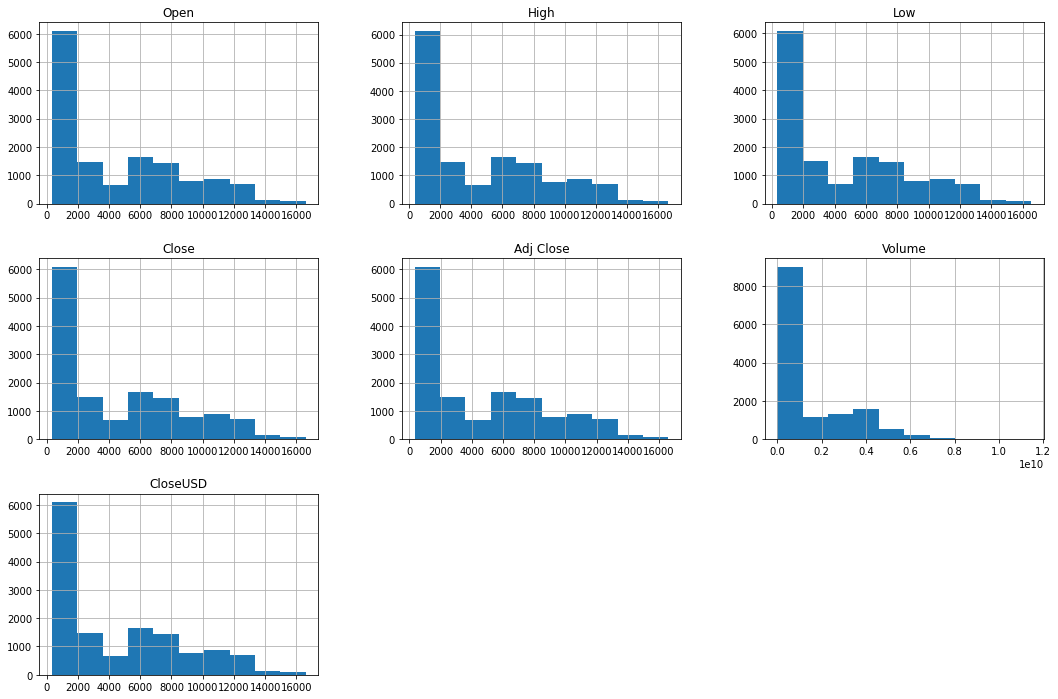

In [23]:
dfnya.hist(figsize=(18,12))
plt.show()

In [45]:
dtset = pd.DataFrame(columns=['1st','2nd','3rd','4th','5th','6th','7th','8th'])
dtset


,1st,2nd,3rd,4th,5th,6th,7th,8th


In [51]:
tempCloseUSDPrice = dfnya[['Date','CloseUSD']]
tempCloseUSDPrice

,Date,CloseUSD
8492,1965-12-31,528.690002
8493,1966-01-03,527.210022
8494,1966-01-04,527.840027
8495,1966-01-05,531.119995
8496,1966-01-06,532.070007
...,...,...
22434,2021-05-24,16464.689450
22435,2021-05-25,16390.189450
22436,2021-05-26,16451.960940
22437,2021-05-27,16531.949220


<AxesSubplot:xlabel='Date', ylabel='CloseUSD'>

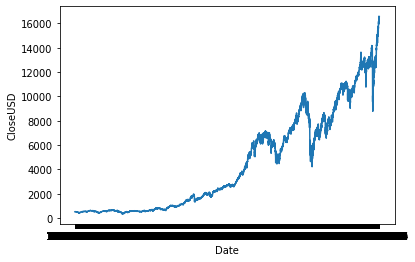

In [29]:
sns.lineplot(x='Date', y='CloseUSD', data=tempCloseUSDPrice)

In [52]:
tempCloseUSDPrice = tempCloseUSDPrice['CloseUSD'].apply(lambda x: int(x))
tempCloseUSDPrice

8492       528
8493       527
8494       527
8495       531
8496       532
         ...  
22434    16464
22435    16390
22436    16451
22437    16531
22438    16555
Name: CloseUSD, Length: 13947, dtype: int64

In [55]:
tempCloseUSDPrice = list(tempCloseUSDPrice)
tempCloseUSDPrice[1]

527

In [56]:
window = 8

for i in range(0,int(dfnya.shape[0]-window)):
    dtset.loc[len(dtset.index)] = list(tempCloseUSDPrice[i:i+window])
dtset

,1st,2nd,3rd,4th,5th,6th,7th,8th
0,528,527,527,531,532,532,533,534
1,527,527,531,532,532,533,534,533
2,527,531,532,532,533,534,533,534
3,531,532,532,533,534,533,534,535
4,532,532,533,534,533,534,535,537
...,...,...,...,...,...,...,...,...
13934,16042,16181,16415,16422,16337,16233,16350,16375
13935,16181,16415,16422,16337,16233,16350,16375,16464
13936,16415,16422,16337,16233,16350,16375,16464,16390
13937,16422,16337,16233,16350,16375,16464,16390,16451


In [57]:
x = dtset.drop(columns='8th')
y = dtset['8th']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

11151
2788
11151
2788


In [60]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)    


LinearRegression()

In [67]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",reg.score(x_test,y_test)*100)


Training Score:
 99.97371026102985
Mean Squared Error:
 99.97733557913995


In [44]:
dtset.dtypes

1st    float64
2nd    float64
3rd    float64
4th    float64
5th    float64
6th    float64
7th    float64
8th    float64
dtype: object

In [75]:
reg.predict(np.array([list(tempCloseUSDPrice[89:89+window-1])]))

/home/mdirfan-code/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([476.07065731])

[1st    10957
 2nd    11016
 3rd    11023
 4th    11038
 5th    10985
 6th    10987
 7th    10936
 Name: 12219, dtype: object]